# Recommendation System

These recommendation system is a system that recommends users new cocktails among 425 unique cocktails.

There are hundreds of cocktails yet most people know only the famous ones. Additionally, it can be difficult for many people to try new cocktails they think they will love. Most of the people might hesitate to try something new when it comes to the cocktails, because there are many options with different ingredients. Our cocktail recommender system encourages people to try new flavours by utilizing data science and various cocktails in the database

In [1]:
# Importing Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# From sklearn importing DictVectorizer: Transforms lists of feature-value mappings to vectors.
# Importing KernelPCA: Kernel Principal component analysis (KPCA).
# Importing itertools provides various functions that work on iterators. 

from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import KernelPCA
import itertools

## Feature Engineering 

Using **Bigquery** we select the ingredients from de database, the id (idDrink) and the name of the Drink (srtDrink)

In [3]:
%%bigquery base

SELECT 
    idDrink,
    strDrink,
    strIngredient1,
    strIngredient2,
    strIngredient3,
    strIngredient4,
    strIngredient5,
    strIngredient6,
    strIngredient7,
    strIngredient8,
    strIngredient9,
    strIngredient10,
    strIngredient11,
    strIngredient12,
    strIngredient13,
    strIngredient14,
    strIngredient15
FROM `bookish-journey-343419.cocktails_dataset.cocktails-table`

Downloading: 100%|██████████| 425/425 [00:00<00:00, 589.90rows/s]


In [4]:
# Print the first 10 rows of the database
print(base.shape)
base.head(10)

(425, 17)


,idDrink,strDrink,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strIngredient10,strIngredient11,strIngredient12,strIngredient13,strIngredient14,strIngredient15
0,11009,Moscow Mule,Vodka,Lime juice,Ginger ale,None,None,None,None,None,None,None,None,None,None,None,None
1,11023,Almeria,Dark rum,Kahlua,Egg white,None,None,None,None,None,None,None,None,None,None,None,None
2,11106,Blackthorn,Sweet Vermouth,Sloe gin,Lemon peel,None,None,None,None,None,None,None,None,None,None,None,None
3,11046,Applecar,Applejack,Triple sec,Lemon juice,None,None,None,None,None,None,None,None,None,None,None,None
4,11007,Margarita,Tequila,Triple sec,Lime juice,Salt,None,None,None,None,None,None,None,None,None,None,None
5,11014,Alexander,Gin,Creme de Cacao,Light cream,Nutmeg,None,None,None,None,None,None,None,None,None,None,None
6,11055,Artillery,Sweet Vermouth,Gin,Bitters,None,None,None,None,None,None,None,None,None,None,None,None
7,11060,Balmoral,Scotch,Sweet Vermouth,Dry Vermouth,Bitters,None,None,None,None,None,None,None,None,None,None,None
8,11008,Manhattan,Sweet Vermouth,Bourbon,Angostura bitters,Ice,Maraschino cherry,Orange peel,None,None,None,None,None,None,None,None,None
9,11004,Whiskey Sour,Blended whiskey,Lemon,Powdered sugar,Cherry,Lemon,None,None,None,None,None,None,None,None,None,None


In [5]:
# Show the type of every column, you can see that from strIngredient12 to strIngredient15 are empty columns.
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   idDrink          425 non-null    int64 
 1   strDrink         425 non-null    object
 2   strIngredient1   425 non-null    object
 3   strIngredient2   425 non-null    object
 4   strIngredient3   361 non-null    object
 5   strIngredient4   237 non-null    object
 6   strIngredient5   154 non-null    object
 7   strIngredient6   83 non-null     object
 8   strIngredient7   45 non-null     object
 9   strIngredient8   4 non-null      object
 10  strIngredient9   2 non-null      object
 11  strIngredient10  1 non-null      object
 12  strIngredient11  1 non-null      object
 13  strIngredient12  0 non-null      object
 14  strIngredient13  0 non-null      object
 15  strIngredient14  0 non-null      object
 16  strIngredient15  0 non-null      object
dtypes: int64(1), object(16)
memory usag

In [6]:
# Drop empty columns
base = base.drop(['strIngredient12','strIngredient13','strIngredient14','strIngredient15'],axis=1)

In [7]:
# Replace NaN with ""

base = base.replace(np.nan,"")

In [8]:
# Join all ingredients into one single row.
base['ingredients'] = base[['strIngredient1','strIngredient2','strIngredient3','strIngredient4','strIngredient5',
        'strIngredient6','strIngredient7','strIngredient8','strIngredient9','strIngredient10','strIngredient11']].agg(','.join, axis=1)
base.ingredients

0                    Vodka,Lime juice,Ginger ale,,,,,,,,
1                      Dark rum,Kahlua,Egg white,,,,,,,,
2             Sweet Vermouth,Sloe gin,Lemon peel,,,,,,,,
3               Applejack,Triple sec,Lemon juice,,,,,,,,
4              Tequila,Triple sec,Lime juice,Salt,,,,,,,
                             ...                        
420      Vodka,Raspberry Liqueur,pineapple juice,,,,,,,,
421    Rum,Vodka,Tequila,Gin,Triple sec,Chambord rasp...
422     Baileys irish cream,Grand Marnier,Kahlua,,,,,,,,
423    Orange Bitters,Green Chartreuse,Gin,Sweet Verm...
424    Everclear,Vodka,Mountain Dew,Surge,Lemon juice...
Name: ingredients, Length: 425, dtype: object

In [9]:
# Function to transform letters to lowercase.

def lower(text):
    text=text.lower()
    return text

# Pass all words throw the funtion and append them
ingredients_low=[]
for i in base.ingredients:
    il=lower(i)
    ingredients_low.append(il)

base['ingredients']=ingredients_low
base.ingredients

0                    vodka,lime juice,ginger ale,,,,,,,,
1                      dark rum,kahlua,egg white,,,,,,,,
2             sweet vermouth,sloe gin,lemon peel,,,,,,,,
3               applejack,triple sec,lemon juice,,,,,,,,
4              tequila,triple sec,lime juice,salt,,,,,,,
                             ...                        
420      vodka,raspberry liqueur,pineapple juice,,,,,,,,
421    rum,vodka,tequila,gin,triple sec,chambord rasp...
422     baileys irish cream,grand marnier,kahlua,,,,,,,,
423    orange bitters,green chartreuse,gin,sweet verm...
424    everclear,vodka,mountain dew,surge,lemon juice...
Name: ingredients, Length: 425, dtype: object

In [10]:
# This function convert a list of ingredients into a dictionary, note: every ingredient gets a 1.
# this mean that the value of every key is 1. key:value

def convert_to_dict(lst):
    d = {} #empty dict
    for ingre in lst:
        d[ingre] = 1
    return d

In [11]:
# We use the function to convert every row into a dictionary. 
# 'vodka': 1, 'lime juice': 1... this will help us later to create a one hot encoding.
base['bagofwords'] = base.ingredients.str.split(',').apply(convert_to_dict)
print(base.bagofwords)

0      {'vodka': 1, 'lime juice': 1, 'ginger ale': 1,...
1      {'dark rum': 1, 'kahlua': 1, 'egg white': 1, '...
2      {'sweet vermouth': 1, 'sloe gin': 1, 'lemon pe...
3      {'applejack': 1, 'triple sec': 1, 'lemon juice...
4      {'tequila': 1, 'triple sec': 1, 'lime juice': ...
                             ...                        
420    {'vodka': 1, 'raspberry liqueur': 1, 'pineappl...
421    {'rum': 1, 'vodka': 1, 'tequila': 1, 'gin': 1,...
422    {'baileys irish cream': 1, 'grand marnier': 1,...
423    {'orange bitters': 1, 'green chartreuse': 1, '...
424    {'everclear': 1, 'vodka': 1, 'mountain dew': 1...
Name: bagofwords, Length: 425, dtype: object


In [12]:
# One Hot Encoding
# DictVectorizer:This transformer turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays or scipy.sparse matrices for use with scikit-learn estimators.
# sparse, default=True. Whether transform should produce scipy.sparse matrices. In this case we set it as False.

vector_dict = DictVectorizer(sparse = False)

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. 
#The fit method is calculating the mean and variance of each of the features present in our data. 
#The transform method is transforming all the features using the respective mean and variance.
# We past every dictionary into a list.
X = vector_dict.fit_transform(base["bagofwords"].tolist())

# We select the column strDrink(name of the drink) from de dataset
y = base.strDrink

## KPCA Method

Kernel Principal Component Analysis (KPCA) is a non-linear dimensionality reduction technique. It is an extension of Principal Component Analysis (PCA) - which is a linear dimensionality reduction technique - using kernel methods.

In [13]:
# Using Kernel PCA
kpca = KernelPCA(n_components=2,kernel="cosine", n_jobs=2)

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. 
#Thus, the parameters learned by our model using the training data will help us to transform our test data.
x_pca = kpca.fit_transform(X)
x_pca.shape

(425, 2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


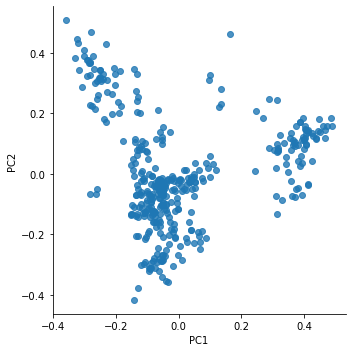

In [14]:
# Plotting the clusters
plot_pca = pd.DataFrame(data = x_pca[:,:2], columns = ["PC1","PC2"])
sns.lmplot("PC1", "PC2", data = plot_pca, palette = "Paired",legend=True, fit_reg = False)

In [15]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4, random_state=42).fit(x_pca)
kmeans.labels_

array([0, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 3, 1, 0, 2, 2, 3, 1, 2, 2, 1, 1,
       3, 3, 1, 3, 2, 0, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3,
       2, 2, 3, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 2, 1, 2, 3, 1, 2, 0, 1, 3, 2, 2, 2, 1, 1, 0, 2, 3, 3, 1, 2, 1,
       2, 3, 2, 1, 1, 1, 2, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 0, 3, 1, 2,
       1, 1, 1, 2, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 3, 1, 1, 1, 1, 2,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 3, 2, 3, 3, 1, 1, 3, 1, 1, 0,
       1, 3, 3, 3, 0, 3, 1, 1, 1, 3, 0, 1, 3, 1, 0, 3, 1, 0, 1, 1, 3, 1,
       1, 3, 3, 3, 1, 3, 0, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,

In [16]:
label = kmeans.fit_predict(x_pca)

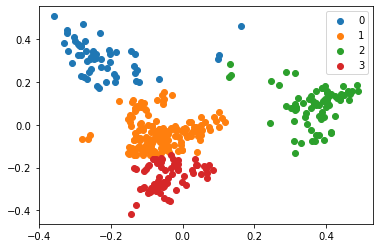

In [17]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [18]:
def get_cosine_distance(objective,n_return = 5):
  values = []
  for i in range(len(X)):
    values.append(1 - spatial.distance.cosine(objective, X[i]))
  ind = np.argpartition(values, -1 * n_return)[-1 * n_return:]
  top_n = y[ind]
  return top_n

In [19]:
get_cosine_distance(X[4])

NameError: name 'spatial' is not defined

In [34]:
np.savetxt("cocktails/cockteles_PCA.csv", x_pca, delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: 'cocktails/cockteles_PCA.csv'

In [18]:
%%bigquery 

CREATE OR REPLACE MODEL
  cocktails_dataset.model_kmeans_cocktail OPTIONS(model_type='kmeans',
    num_clusters=4) AS
SELECT * FROM `bookish-journey-343419.cocktails_dataset.cocktail_PCA` 

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1880.29query/s]                        


""


In [19]:
%%bigquery label2

SELECT * FROM ML.PREDICT(MODEL `bookish-journey-343419.cocktails_dataset.model_kmeans_cocktail`,
(SELECT * FROM `bookish-journey-343419.cocktails_dataset.cocktail_PCA` ) )

Downloading: 100%|██████████| 425/425 [00:00<00:00, 454.71rows/s]


In [21]:
label

array([0, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 3, 1, 0, 2, 2, 3, 1, 2, 2, 1, 1,
       3, 3, 1, 3, 2, 0, 3, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3,
       2, 2, 3, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 2, 1, 2, 3, 1, 2, 0, 1, 3, 2, 2, 2, 1, 1, 0, 2, 3, 3, 1, 2, 1,
       2, 3, 2, 1, 1, 1, 2, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 0, 3, 1, 2,
       1, 1, 1, 2, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 3, 1, 1, 1, 1, 2,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 3, 2, 3, 3, 1, 1, 3, 1, 1, 0,
       1, 3, 3, 3, 0, 3, 1, 1, 1, 3, 0, 1, 3, 1, 0, 3, 1, 0, 1, 1, 3, 1,
       1, 3, 3, 3, 1, 3, 0, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,

In [22]:
label2

,CENTROID_ID,NEAREST_CENTROIDS_DISTANCE,double_field_0,double_field_1
0,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.219229804456...",-0.053085,-0.060194
1,1,"[{'CENTROID_ID': 1, 'DISTANCE': 0.494423412187...",0.387715,0.171609
2,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.530632568818...",-0.132017,-0.037934
3,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.257461736544...",-0.060826,-0.054037
4,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.122367182377...",-0.063378,-0.079182
...,...,...,...,...
420,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.557849814723...",0.027153,-0.032151
421,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.560951083004...",-0.094220,-0.189521
422,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.937829454434...",0.051387,0.036494
423,4,"[{'CENTROID_ID': 4, 'DISTANCE': 0.506523716539...",-0.022951,-0.182921


In [20]:
#Getting unique labels
 
u_labels2 = np.unique(label2)
 
#plotting the results:
 
for i in u_labels2:
    plt.scatter(x_pca[label2 == i , 0] , x_pca[label2 == i , 1] , label2 = i)
plt.legend()
plt.show()

TypeError: '<' not supported between instances of 'dict' and 'int'

# References

https://plotly.com/python/pca-visualization/

https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python

https://medium.com/web-mining-is688-spring-2021/how-dishes-are-clustered-together-based-on-the-ingredients-3b357ac02b26

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.askpython.com/python/examples/plot-k-means-clusters-python

https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html

In [36]:
import yaml
import string
import requests

# Recall from the APIs for Data lab that including passwords in code is a terrible practice. 
# So we include a yaml file.

config_file = open('cocktails.yaml', 'r')
config = yaml.safe_load(config_file)

In [37]:
# Imports the Google Cloud client library
from google.cloud import storage

bucket = config['bucket']

# Instantiates a client
# Now  that we have a service account created and JSON file loaded somewhere, we need to create a client object
client = storage.Client()

# Retrieve an existing bucket
gcs_bucket = client.get_bucket(bucket)

In [42]:
blob = gcs_bucket.blob("cocktails/")
with blob.open(mode = 'w') as file:
    np.savetxt("cocktails_PCA.csv", x_pca, delimiter=",")